In [2]:
import pandas
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

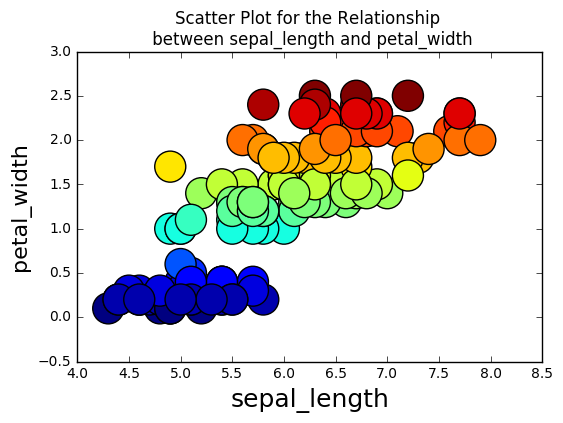

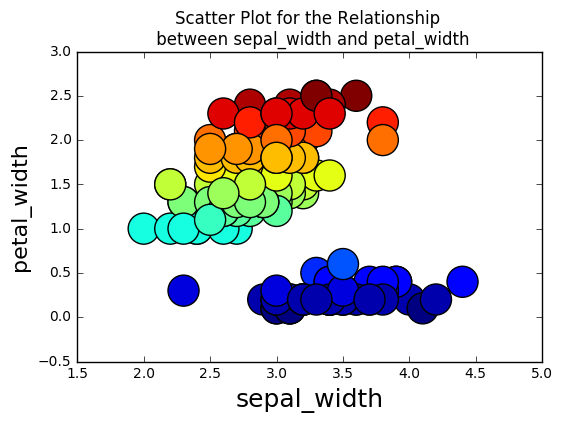

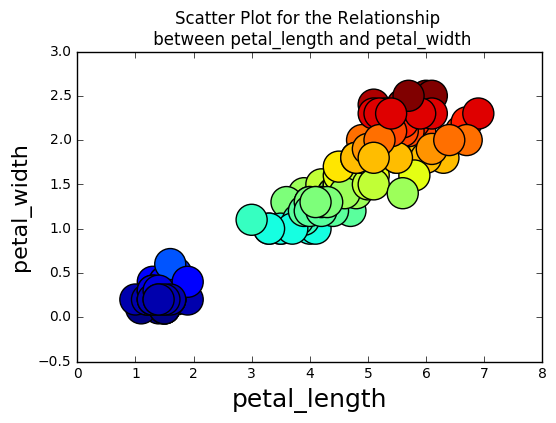

In [3]:
df = pandas.read_csv("flowers.csv",names = ['sepal_length','sepal_width','petal_length','petal_width'])
for i in range(3):
    tempxname = df.columns[i]
    tempyname = df.columns[3]
    x = df[tempxname]
    y = df[tempyname]
    plt.scatter(x, y, c=y, s=500)
    plt.xlabel(tempxname, fontsize=18)
    plt.ylabel(tempyname, fontsize=16)   
    plt.title('Scatter Plot for the Relationship \n between '+tempxname+' and '+tempyname)
    plt.show()
    plt.savefig('Scatter_Plot1_'+str(i)+'.jpg')
    plt.close()

1
2
3
4
5


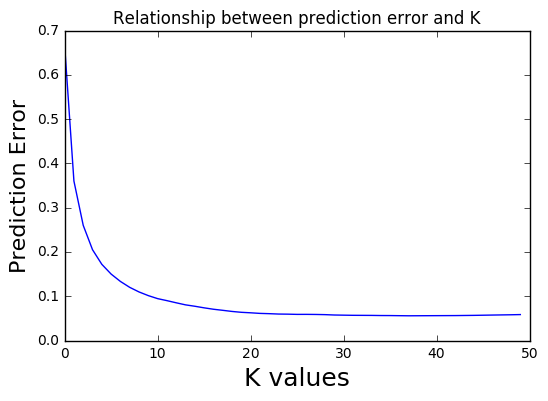

In [4]:
random.seed(1234)
df = pandas.read_csv('flowers.csv', header=None)
max_values = df.max()
min_values = df.min()

def KMeans():
    MAX_T,t = 100,0
    # init
    centroids = list()
    for k in xrange(3):
        pt = list()
        for i in xrange(4):
            pt.append(float(np.random.uniform(min_values[i], max_values[i])))
        centroids.append(np.asarray(pt))
        
    # at least 5 iterations
    while(True):     
        t+=1
        old_centroids = centroids[:]
        assignment = {k: list() for k in xrange(3)}#dictionary stores index of each data sample's record;
        rev_assignment = list()
        sums = {k: np.zeros(4) for k in xrange(3)} #dictionary stores detail feature of each data sample's record;
        # Assign centroids
        for i, r in df.iterrows():
            r = np.asarray(r)
            dists = list(map(lambda x: ((x - r) ** 2).sum(), centroids))
            pick = list(dists).index(min(dists))
            assignment[pick].append(i)
            rev_assignment.append(pick)
            sums[pick] += r
        for k in xrange(3):
            centroids[k] = sums[k] / len(assignment[k])
        print t
        if (t>=5 and np.allclose(old_centroids,centroids)) or t >=MAX_T:
            break   
    return rev_assignment


def KNN(K):
    
    traindata_np = [np.asarray(x[:-1]) for _, x in traindf.iterrows()]
    trainlabel = [x[-1] for _, x in traindf.iterrows()]
    
    assignment = list()
    testlabel = list()
    
    # test data
    for i, r in testdf.iterrows():
        testdata_np = np.asarray(r[:-1])
        dists = list(map(lambda x: ((x - testdata_np) ** 2).sum(), traindata_np))
        dists = sorted(zip(dists, trainlabel))
        votes = {0: 0, 1: 0, 2: 0}
        for d, j in dists[:K]:
            votes[int(j)] += 1
        max_votes = max(votes.values())
        for k, v in votes.iteritems():
            if v == max_votes:
                assignment.append(k)
                break
        testlabel.append(int(r[-1]))

    return 1 - sum([1 if testlabel[i] == assignment[i] else 0 for i in range(len(testlabel))])/float(len(testlabel))



if __name__ == '__main__':
    km_assignment = KMeans()
    
    # true labels:
    labels = [0] * 50 + [1] * 50 + [2] * 50
    df['labels'] = pandas.Series(labels,index = df.index)
    
    # five-fold cross-validation:
    x = range(150)
    np.random.shuffle(x)
    results = []
    cv = []
    for k in range(50):
        for i in range(0,150,150/5):
            testidx = x[i:i+150/5]
            trainidx = list(set(range(150)).difference(set(testidx)))
            traindf = df.iloc[trainidx]
            testdf = df.iloc[testidx]
            results.append(KNN(k)) 
        cv.append(sum(results)/len(results))

    plt.plot(range(50),cv)
    plt.xlabel('K values', fontsize=18)
    plt.ylabel('Prediction Error', fontsize=16) 
    plt.title('Relationship between prediction error and K')
    plt.show()
    plt.savefig('Prediction error and K.jpg')
    plt.close()

Accuracy for Kmeans: 0.0933333333333


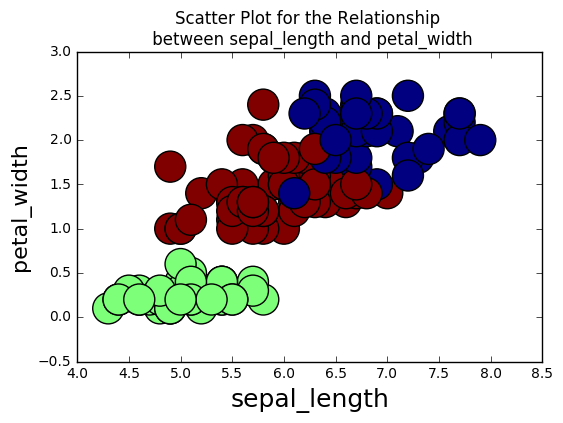

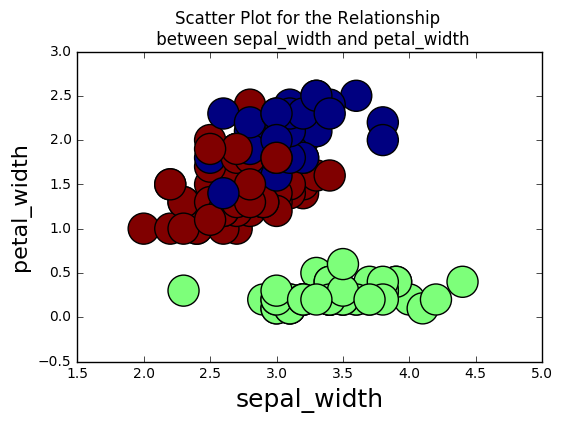

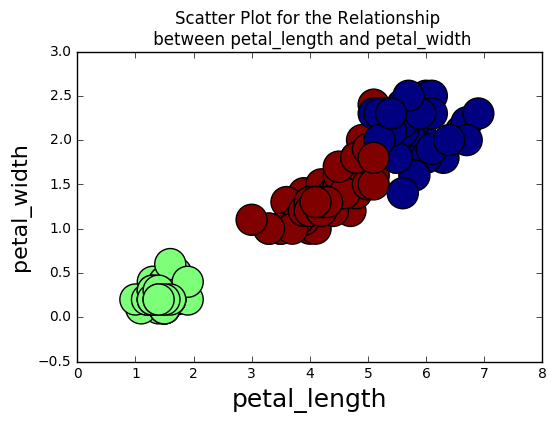

In [5]:
df = pandas.read_csv("flowers.csv",names = ['sepal_length','sepal_width','petal_length','petal_width'])
df['predict'] = pandas.Series(km_assignment,index = df.index)
labels = [0]*50 + [1]*50 + [2]*50
print 'Accuracy for Kmeans:',sum([1 if labels[i] == df.predict.values[i] else 0 for i in range(len(labels))])/float(len(df.predict.values))
for i in range(3):
    tempxname = df.columns[i]
    tempyname = df.columns[3]
    x = df[tempxname]
    y = df[tempyname]
    plt.scatter(x, y, c=df.predict.values, s=500)
    plt.xlabel(tempxname, fontsize=18)
    plt.ylabel(tempyname, fontsize=16)   
    plt.title('Scatter Plot for the Relationship \n between '+tempxname+' and '+tempyname)
    plt.show()
    plt.savefig('Scatter_Plot2_'+str(i)+'.jpg')
    plt.close()

### 4. Compare your answer with the groud truth and explain why the algorithm worked/failed.
#### According to my answer, the accuracy is nearly 88.7%, which is a good result. Owing to the uncertain initialization of K-Means algorithm, sometimes it takes a lot of times to converge to local optimum and might misclassify the label, leading to low accuracy. If not, we might need to generate another inital values. Besides, considering the distribution of this dataset is spherical and balaced, K-Means is supposed to have a good performance like this. 

### 5. Explain which K would you choose and why the prediction error varies with the change of K.
#### According to my result called 'Prediction error and k.jpg', I will choose K from 10 to 20, for example 17. As we can see from this picture, when K increases from 1 to 10, prediction decreases like exponentially. Once after 10 especially 17, it comes to a smooth reduction area.  On the other hand, the computation burden would increase with larger K values and underfitting might happen after 50 or 100. So after taking these facts into consideration, I choose 17 as my final K value.

#### The reason why there is negative relationship between prediction error and K is simple: since KNN takes the majority vote to classify the test data, the more nearby samples for majority votes, the higher accuracy this algorithm would obtain. In other words, if K is too small, it would lead to overfitting situation. If K is too large, it might cause underfitting.